In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

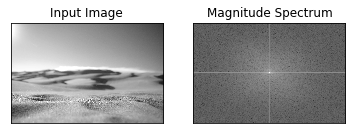

In [2]:
img = cv2.imread('IMGP2395.JPG',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()



In [11]:
x_size=len(magnitude_spectrum)

In [12]:
y_size=len(magnitude_spectrum[0])

In [29]:
kernel=np.ones([x_size,y_size])

In [30]:
for col in range(x_size):
    for row in range(y_size):
        if row>y_size*0.4 and row<y_size*0.6 and col>x_size*0.4 and col<x_size*0.6:
            kernel[col,row]=0

    

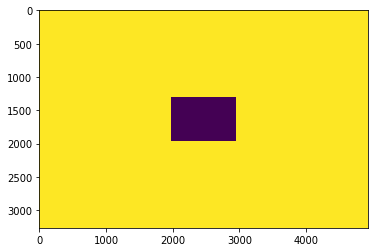

In [31]:
plt.imshow(kernel)

In [38]:
filteredFFT[0]=np.multiply(kernel,dft_shift[:,:,0])
filteredFFT[1]=np.multiply(kernel,dft_shift[:,:,1])

ValueError: could not broadcast input array from shape (3264,4928) into shape (4928)

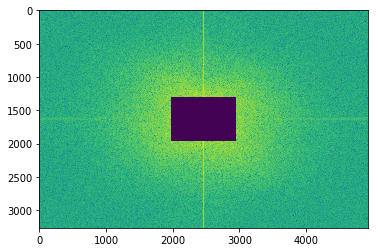

In [33]:
plt.imshow(filteredFFT)

In [34]:
restored=cv2.idft(filteredFFT)

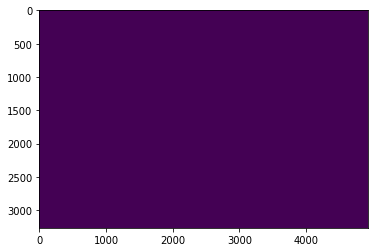

In [35]:
plt.imshow(abs(restored))

array([[  1.22714304e+02,   2.41161030e+01,   6.29541616e-01, ...,
          9.42480497e+00,   6.29541616e-01,   2.41161030e+01],
       [  2.46903915e+01,   1.77583805e+01,   9.26670383e-01, ...,
          5.92562484e+00,   8.80787341e-01,   1.69523847e+01],
       [  8.14879414e-01,   8.71884872e-01,   1.43286968e-01, ...,
          1.44308589e-01,   1.07103721e-01,   1.17769522e+00],
       ..., 
       [  9.67947364e+00,   5.90554173e+00,   1.70935721e-01, ...,
          1.84979511e+00,   2.25722187e-01,   6.11458397e+00],
       [  8.14879414e-01,   1.17769522e+00,   1.07103721e-01, ...,
          2.23298004e-01,   1.43286968e-01,   8.71884872e-01],
       [  2.46903915e+01,   1.69523847e+01,   8.80787341e-01, ...,
          5.83697427e+00,   9.26670383e-01,   1.77583805e+01]])